<a href="https://colab.research.google.com/github/lucas-azdias/Scripts-Universidade/blob/main/Python/Aprendizagem%20de%20M%C3%A1quina/04/%C3%81rvores%20de%20decis%C3%A3o/%C3%81rvores%20de%20decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Árvores de Decisão
Neste tutorial, vamos explorar o algoritmo Árvore de Decisão utilizando a biblioteca scikit-learn. A Árvore de Decisão é um método de classificação que utiliza uma estrutura hierárquica de nós para tomar decisões a partir de atributos das amostras. O funcionamento do algoritmo se baseia na seleção dos melhores atributos para particionar o conjunto de dados de forma a maximizar o ganho de informação e, consequentemente, a reduzir a entropia dos dados.

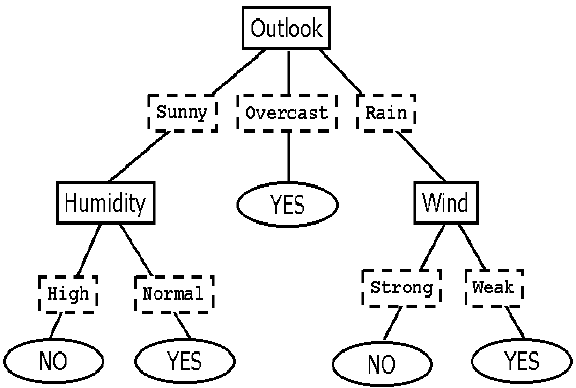

#Dataset

Aqui apresentamos alguns datasets para ilustrar árvores de decisão.
Você pode testar o pipeline de treino e teste para diferentes datasets:

*   Classificação de Vinhos
*   Cancer de Pulmão
*   Iris (Flores)



In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
import pandas as pd
#Seed (Garante a reproducibilidade)
random_state = 9999

# carrega os dados do conjunto de dados iris
##dataset = load_iris()
dataset = load_wine()
##dataset = load_breast_cancer()


# converte os dados em um DataFrame do Pandas
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# adiciona a coluna de target
df['target'] = dataset.target

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0,1
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1


#Holdout


In [2]:
from sklearn.model_selection import train_test_split

X = dataset.data
y = dataset.target

print("Full: ", X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

print("Train: ", X_train.shape,y_train.shape)
print("Test: ", X_test.shape,y_test.shape)


Full:  (178, 13) (178,)
Train:  (119, 13) (119,)
Test:  (59, 13) (59,)


#Treinando o Modelo

Durante o treinamento de uma árvore de decisão, o algoritmo avalia os atributos de cada amostra e divide os dados em subgrupos mais homogêneos com base no atributo mais relevante. Esse processo é repetido recursivamente para cada subgrupo até que sejam alcançadas folhas puras, contendo apenas amostras de uma única classe. Para classificar uma nova amostra, basta percorrer a árvore seguindo as ramificações correspondentes aos valores de seus atributos até chegar a uma folha que indica a classe mais provável. Em resumo, a árvore de decisão cria uma estrutura de decisão em forma de árvore durante o treinamento e a usa posteriormente para classificar novas amostras

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build a Gaussian Classifier
model = DecisionTreeClassifier()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# Teste de sanidade
accuracy = accuracy_score(y_pred, y_train)

print("Train Accuracy:", accuracy)

Train Accuracy: 1.0


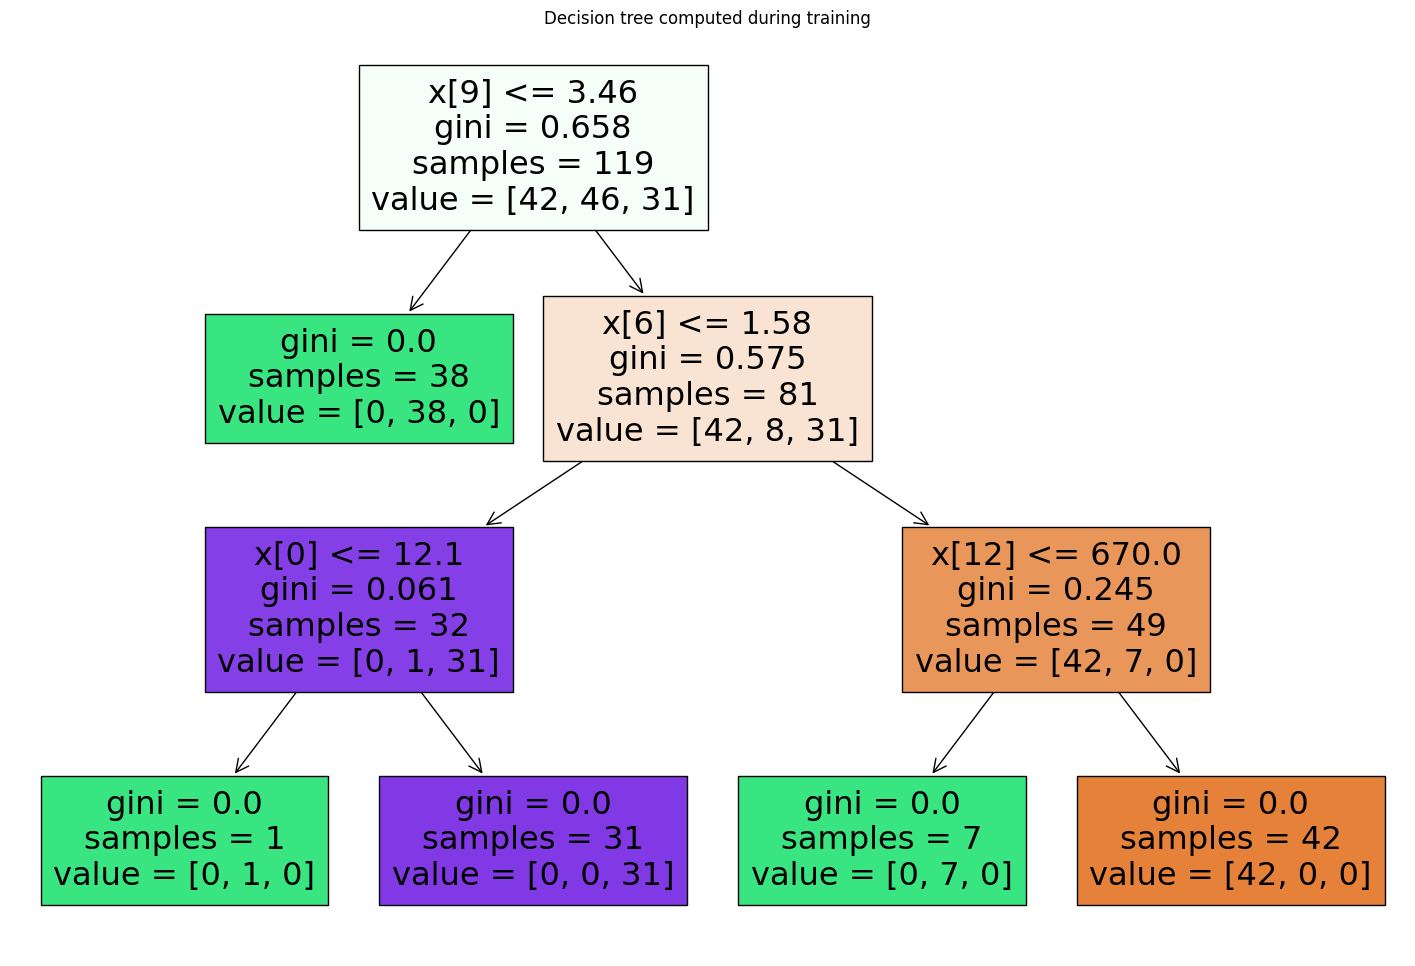

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plot_tree(model, filled=True)
plt.title("Decision tree computed during training")
plt.show()

#Testando

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Test Accuracy:", accuracy)

diff = y_pred - y_test

wrong = np.where(diff != 0)
print(f"Wrong predictions: {wrong}")

# Wrong predictions: (array([46, 50, 55]),)
print(list(X_test[46]), y_test[46])
print(list(X_test[50]), y_test[50])
print(list(X_test[55]), y_test[55])

Test Accuracy: 0.9491525423728814
Wrong predictions: (array([46, 50, 55]),)
[12.37, 1.21, 2.56, 18.1, 98.0, 2.42, 2.65, 0.37, 2.08, 4.6, 1.19, 2.3, 678.0] 1
[12.72, 1.81, 2.2, 18.8, 86.0, 2.2, 2.53, 0.26, 1.77, 3.9, 1.16, 3.14, 714.0] 1
[12.64, 1.36, 2.02, 16.8, 100.0, 2.02, 1.41, 0.53, 0.62, 5.75, 0.98, 1.59, 450.0] 1


#Análise dos Resultados

Analisando a acurácia do treino e teste, nota-se que o modelo generalizou o problema, ainda que com acurácia abaixo de 85%.

In [6]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.88      1.00      0.94        22
           2       1.00      0.94      0.97        18

    accuracy                           0.95        59
   macro avg       0.96      0.95      0.95        59
weighted avg       0.96      0.95      0.95        59



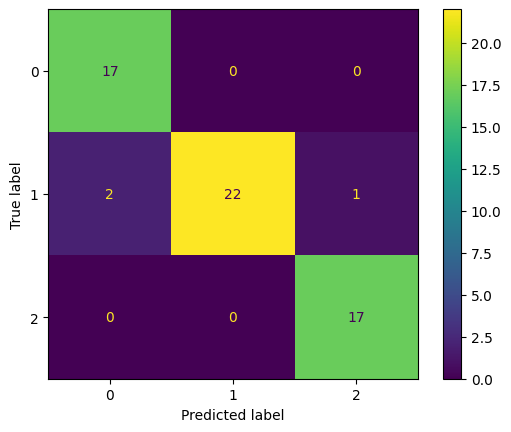

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Analisando Fronteiras de Decisão

Abaixo computamos com o auxilio do scikit-learn, as fronteiras de decisão, utilizando pares de váriaveis.

<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-8-0e5347d18818>:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


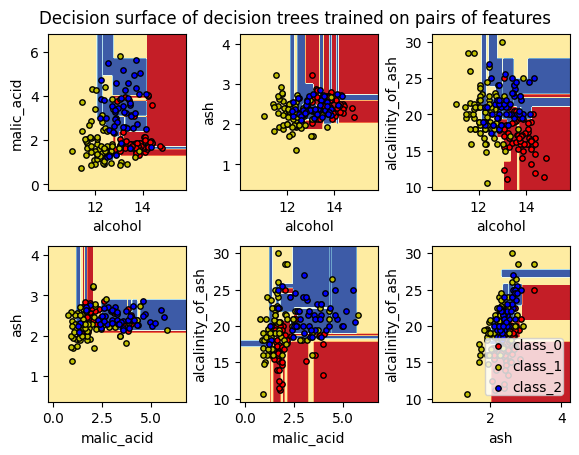

In [8]:
import numpy as np


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = len(np.unique(y))
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # We only take the two corresponding features
    X = dataset.data[:, pair]
    y = dataset.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=dataset.feature_names[pair[0]],
        ylabel=dataset.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=dataset.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

#Exercícios

Utilizando a função 'make_classification' para gerar datasets sintéticos, crie diferentes cenários e avalie o desempenho da árvore de decisao.

Considere:

* Aumentar o número de características
* Complexidade do dataset (Classes com overlap ou linearmente separaveis)

Avalie:
* Tempo de treino e teste
* Desepenho (Acurácia e Matriz de Confusão)
* Produza uma analise crítica



O Scikit-Learn e o Kaggle também possuem outras bases interessantes. Pesquise nos respectivos sites, bases de classificação e teste com os três modelos que já aprendemos (KNN, NAIVE BAYES e ÁRVORES)